# Порешаем задачу про Титаник ... В очередной раз.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, train_test_split
%matplotlib inline

In [50]:
titanic_data = pd.read_csv("../../../Datasets/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
X = titanic_data.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
y = titanic_data.Survived

In [52]:
print(X.isnull().sum(), end="\n\n")
age_median = X.Age.median()
X.fillna(age_median, inplace=True)
print(X.isnull().sum())

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [53]:
X = pd.get_dummies(X)
X = X.drop(["Sex_female"], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [55]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [56]:
parameters = {
    "max_depth": range(1, 10),
    "min_samples_split": range(5, 101, 5),
    "min_samples_leaf": range(5, 101, 5)
}

search = RandomizedSearchCV(clf, parameters)
search.fit(X_train, y_train)

clf = search.best_estimator_

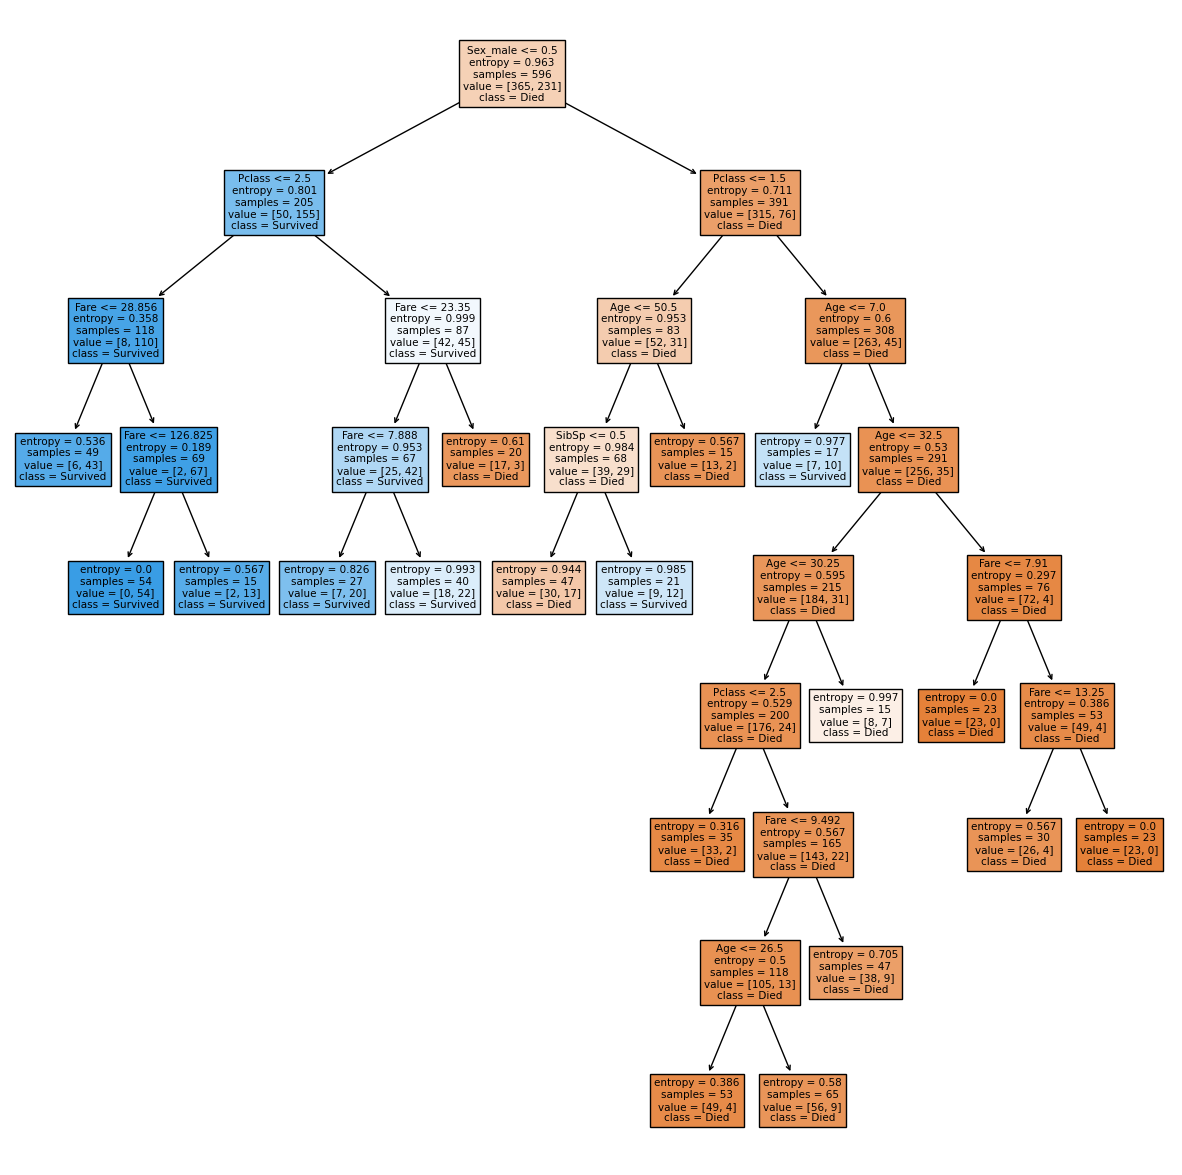

In [57]:
fig = plt.figure(figsize=(15, 15))
_ = tree.plot_tree(
    clf, 
    filled=True, 
    class_names=["Died", "Survived"],
    feature_names=list(X)
)

In [58]:
clf.score(X_test, y_test)

0.8

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
clf_rf = RandomForestClassifier()

In [61]:
parameters = {"n_estimators": [10, 20, 30], "max_depth": [2, 5, 7, 10]}

In [62]:
search = GridSearchCV(clf_rf, parameters, cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [63]:
best_clf = search.best_estimator_
search.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [64]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.15774392, 0.1273245 , 0.05739563, 0.02904389, 0.13867929,
       0.48981276])

In [65]:
feature_importances_df = pd.DataFrame({
    "features": list(X),
    "feature_importances": feature_importances    
})

feature_importances_df.sort_values("feature_importances", ascending=False)

,features,feature_importances
5,Sex_male,0.489813
0,Pclass,0.157744
4,Fare,0.138679
1,Age,0.127325
2,SibSp,0.057396
3,Parch,0.029044
